# BDC2020 Reto México (Solución Alternativa)
## Luis Fernando Pardo Sixtos
## Andrea Monserrat Ruiz Gómez


Este código utiliza la librería EvoCluster para resolver el problema de clusteriación utilizando Algoritmos Evolutivos.
Nuestro acercamiento intenta optimizar la función de pérdida TWVC (la función objetivo de k-medias) sumada con dos penalizaciones, una para garantizar el balanceo en cantidad de clientes y otra para garantizar el balanceo en volumen.


El código de EvoCluster está disponible en https://github.com/RaneemQaddoura/EvoCluster . La versión en esta carpeta fue modificada en los archivos objectives.py, CFFA.py y optimizer.py para poder optimizar nuestra función de pérdida utilizando el optimizador FFA.

Este notebook esta basado en el que los autores presentan en la página. Los cambios permiten optimizar cualquier función objetivo con cualquier optimizador a excepción de la función que proponemos, que solo se puede optimizar utilizando FFA.

In [1]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('ubicaciones.csv')

vols = np.array(data['Vol_Entrega'])
scaler = StandardScaler()
coords = scaler.fit_transform(data[['lat', 'lon']].to_numpy())

In [2]:
# Select optimizers
# "SSA","PSO","GA","BAT","FFA","GWO","WOA","MVO","MFO","CS"
optimizer=["FFA"]

In [3]:
# Select objective function
# "SSE","TWCV","SC","DB","DI"
objectivefunc=["TWCV_vol"] 

In [4]:
# Select data sets
dataset_List = ["coords"]

In [5]:
# Select number of repetitions for each experiment. 
# To obtain meaningful statistical results, usually 30 independent runs are executed for each algorithm.
NumOfRuns=2

In [6]:
# Select general parameters for all optimizers (population size, number of iterations) ....
params = {'PopulationSize' : 100, 'Iterations' : 100}

In [7]:
#Choose whether to Export the results in different formats
export_flags = {'Export_avg':True, 'Export_details':True, 'Export_details_labels':True, 
'Export_convergence':True, 'Export_boxplot':True}

<h2>Run Framework</h2>

In [8]:
# Run EvoCluster
from optimizer import run
run(optimizer, objectivefunc, dataset_List, NumOfRuns, params, export_flags, n_clusters=[6], auto_cluster=False, labels_exist=False, vols=vols, gamma=0.1, gamma_nodes=0.8)

Dataset: coords
k: 6
Run no.: 0
Population Size: 100
Iterations: 100
FFA is optimizing  "TWCV_vol"
['At iteration 0 the best fitness is 1648.1773006259186']
['At iteration 1 the best fitness is 1648.1773006259186']
['At iteration 2 the best fitness is 1587.4960031403032']
['At iteration 3 the best fitness is 1587.4960031403032']
['At iteration 4 the best fitness is 1587.4960031403032']
['At iteration 5 the best fitness is 1587.4960031403032']
['At iteration 6 the best fitness is 1587.4960031403032']
['At iteration 7 the best fitness is 1587.4960031403032']
['At iteration 8 the best fitness is 1559.1372626902253']
['At iteration 9 the best fitness is 1551.332213151882']
['At iteration 10 the best fitness is 1534.654292577122']
['At iteration 11 the best fitness is 1527.6306706013236']
['At iteration 12 the best fitness is 1527.6306706013236']
['At iteration 13 the best fitness is 1518.340575168849']
['At iteration 14 the best fitness is 1518.340575168849']
['At iteration 15 the best fit

['At iteration 37 the best fitness is 1453.2301989819894']
['At iteration 38 the best fitness is 1452.5294984965221']
['At iteration 39 the best fitness is 1452.5294984965221']
['At iteration 40 the best fitness is 1451.9831302637556']
['At iteration 41 the best fitness is 1451.892771041346']
['At iteration 42 the best fitness is 1451.772365248793']
['At iteration 43 the best fitness is 1451.730488782784']
['At iteration 44 the best fitness is 1451.583518589941']
['At iteration 45 the best fitness is 1451.583518589941']
['At iteration 46 the best fitness is 1451.583518589941']
['At iteration 47 the best fitness is 1451.583518589941']
['At iteration 48 the best fitness is 1451.56816656207']
['At iteration 49 the best fitness is 1451.5426822066424']
['At iteration 50 the best fitness is 1451.5426822066424']
['At iteration 51 the best fitness is 1451.4290879706286']
['At iteration 52 the best fitness is 1451.4262172275312']
['At iteration 53 the best fitness is 1451.367002015612']
['At it

<h2>Results Files and Plots</h2>

In [9]:
#import some useful packages to view the results' files in colab
import pandas as pd
import os
import datetime


In [10]:
#Select the experiments folder
foldernames = [filename for filename in os.listdir() if filename.startswith(str(datetime.datetime.now().year))]

In [11]:
print(foldernames)

['2020-11-29-11-09-26', '2020-11-29-11-10-20', '2020-11-29-11-10-37']


In [12]:
#Get the selected folder
foldername = '2020-11-29-11-10-37'

<h4>Detailed Results File</h4>

In [13]:
#Show the detailed results file
filename = foldername +'/experiment_details.csv' 
df = pd.read_csv(filename)
df.head(12)

,Dataset,Optimizer,objfname,k,ExecutionTime,SSE,TWCV,SC,DI,DB,...,Iter91,Iter92,Iter93,Iter94,Iter95,Iter96,Iter97,Iter98,Iter99,Iter100
0,coords,FFA,TWCV_vol,6,429.83,537.83,185.7,0.31,1.0,0.83,...,1466.2,1466.2,1466.2,1466.2,1466.2,1466.2,1466.2,1466.2,1466.2,1466.2
1,coords,FFA,TWCV_vol,6,426.90,283.78,170.5,0.31,1.0,0.86,...,1451.0,1451.0,1451.0,1451.0,1451.0,1451.0,1451.0,1451.0,1451.0,1451.0


<h4>Labels Results File</h4>

In [14]:
#Show the labels results file
filename = foldername +'/experiment_details_Labels.csv' 
header_names=['Dataset','Optimizer','objfname', 'k'] + ['label' + str(i) for i in range(3625)]
df = pd.read_csv(filename,names=header_names,dtype=object)[1:]
df.head(12)

,Dataset,Optimizer,objfname,k,label0,label1,label2,label3,label4,label5,...,label3615,label3616,label3617,label3618,label3619,label3620,label3621,label3622,label3623,label3624
1,coords,FFA,TWCV_vol,6,4,0,2,4,2,4,...,2,4,5,4,4,1,1,3,4,4
2,coords,FFA,TWCV_vol,6,1,1,0,1,0,0,...,0,3,2,0,1,4,4,3,3,3


<Figure size 432x288 with 0 Axes>

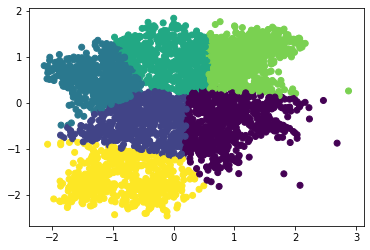

In [15]:
labs=df.iloc[1][['label%d'%i for i in range(3625)]].to_numpy().astype(int)
plt.figure()
plt.scatter(coords[:,0], coords[:,1], c=labs)
plt.show()

In [16]:
def point_clust_dist(point, clust):
    dif = (point-clust)**2
    return dif.sum(1).mean()

In [17]:
clust_points = [coords[labs==i] for i in range(6)]

In [19]:
for r in range(NumOfRuns):
    labs=df.iloc[r][['label%d'%i for i in range(3625)]].to_numpy().astype(int)
    means = np.array([np.mean(coords[np.where(labs==i)], axis=0) for i in range(6)])
    results = np.zeros((len(data), 6))
    for i in range(len(data)):
        results[i][labs[i]]=1
        if data.iloc[i]['Frecuencia'] >1:
            distances = np.array([point_clust_dist(coords[i], clust_points[c]) for c in range(6)])
            dif = np.argsort(distances)
            if labs[i]==dif[0]:
                results[i][dif[1]]=1
            else:
                results[i][dif[0]]=1
            if data.iloc[i]['Frecuencia'] ==3:
                if labs[i] == dif[0] or labs[i] == dif[1]:
                    results[i][dif[2]]=1
                else:
                    results[i][dif[1]]=1
#     results = np.zeros((len(data), 6))
#     for i in range(len(data)):
#         results[i][labs[i]]=1
#         if data.iloc[i]['Frecuencia'] >1:
#             dif = (coords[i][0]-means[:,0])**2
#             dif += (coords[i][1]-means[:,1])**2
#             dif = np.argsort(dif)
#             if labs[i]==dif[0]:
#                 results[i][dif[1]] = 1
#             else:
#                 results[i][dif[0]] = 1
#             if data.iloc[i]['Frecuencia'] ==3:
#                 if labs[i]==dif[0] or labs[i]==dif[1]:
#                     results[i][dif[2]] = 1
#                 else:
#                     results[i][dif[1]] = 1
#     if data.iloc[i]['Frecuencia'] != sum(results[i]):
#         print(results[i])
    with open('id_cliente.pickle', 'rb') as f:
      id_cliente = pickle.load(f)

    results_df = pd.DataFrame(results)

    results_df.columns = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6']

    results_df['Id_Cliente'] = id_cliente

    results_df = results_df[['Id_Cliente', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']].astype(int)

    results_df.to_csv('%s%d.csv'%(optimizer[0],r), header=True, index=False)

In [200]:
for i in range(6):
    print(sum(data[labs==i]['Vol_Entrega']))

8031.6666666599995
10657.499999993
6487.0000000029995
8107.33333333
7534.5
7016.50000001


In [202]:
print(np.sum(results, axis=0))

[594. 784. 595. 711. 700. 593.]


In [201]:
np.std(results.sum(0), axis=0)

73.70982898426023

In [176]:
vols = np.expand_dims(data['Vol_Entrega'].to_numpy(), 1)

In [177]:
delivered = results*vols

In [178]:
delivered

array([[ 0. ,  0. ,  0. ,  0. ,  2. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , 17. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  2. ],
       ...,
       [ 0. ,  0. ,  6. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , 31. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , 18.5, 18.5,  0. ,  0. ]])

In [179]:
print(np.std(delivered.sum(0), axis=0))

1836.101052247583


In [180]:
for i in range(6):
    print(len(data[labs==i]))

573
607
567
573
644
661


In [181]:
means = np.array([np.mean(coords[np.where(labs==i)], axis=0) for i in range(6)])

In [182]:
results = np.zeros((len(data), 6))

In [ ]:
for i in range(len(data)):
    results[i][labs[i]]=1
    if data.iloc[i]['Frecuencia'] >1:
        dif = (coords[i][0]-means[:,0])**2
        dif += (coords[i][1]-means[:,1])**2
        dif = np.argsort(dif)
        if labs[i]==dif[0]:
            results[i][dif[1]] = 1
        else:
            results[i][dif[0]] = 1
        if data.iloc[i]['Frecuencia'] ==3:
            if labs[i]==dif[0] or labs[i]==dif[1]:
                results[i][dif[2]] = 1
            else:
                results[i][dif[1]] = 1
    if data.iloc[i]['Frecuencia'] != sum(results[i]):
        print(results[i])
        

In [ ]:
results[3]

array([1., 0., 0., 1., 1., 0.])

In [ ]:
import pickle
with open('/content/id_cliente.pickle', 'rb') as f:
    id_cliente = pickle.load(f)

results_df = pd.DataFrame(results)

results_df.columns = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6']

results_df['Id_Cliente'] = id_cliente

results_df = results_df[['Id_Cliente', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']].astype(int)

results_df.to_csv('GA1.csv', header=True, index=False)